In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [39]:



wine_df = pd.read_csv('/Wine.csv')


print(wine_df.head())


X = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values


target_names = wine_df['Class'].unique()
feature_names = wine_df.columns[:-1]


number_of_classes = len(target_names)
number_of_features = len(feature_names)
number_of_instances = X.shape[0]

print("Број и имиња на класи:", number_of_classes, target_names)
print("Број и имиња на атрибути:", number_of_features, feature_names)
print("Број на податочни примероци:", number_of_instances)


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [40]:
wine_df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [41]:
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [42]:
wine_df.isnull().sum()

,0
Class,0
Alcohol,0
Malic acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0


In [45]:
wine_df.value_counts("Class")

,count
Class,
2,71
1,59
3,48


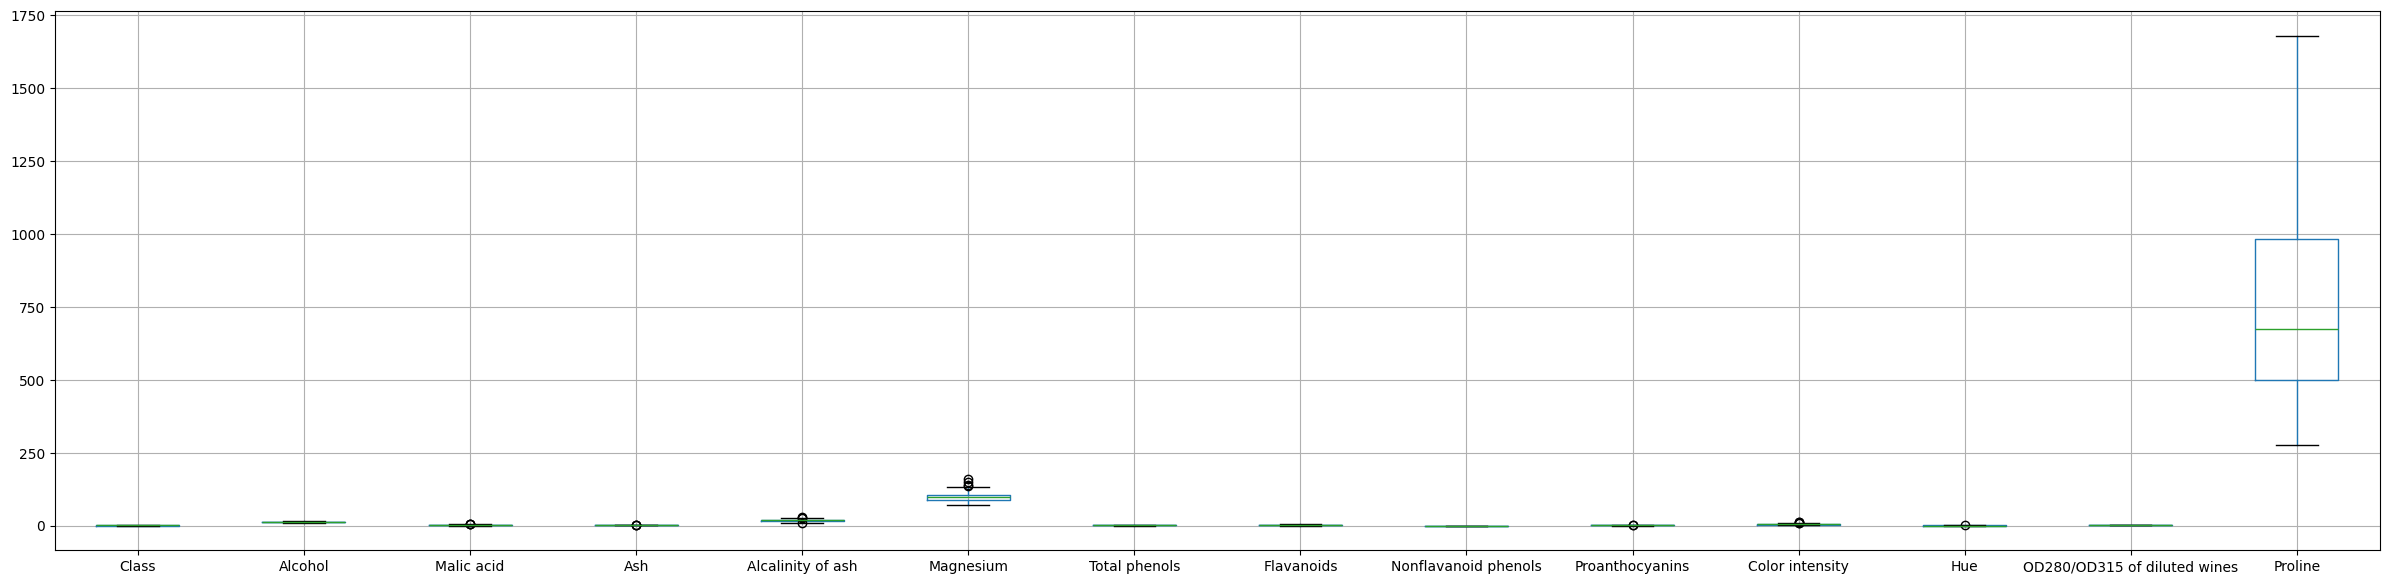

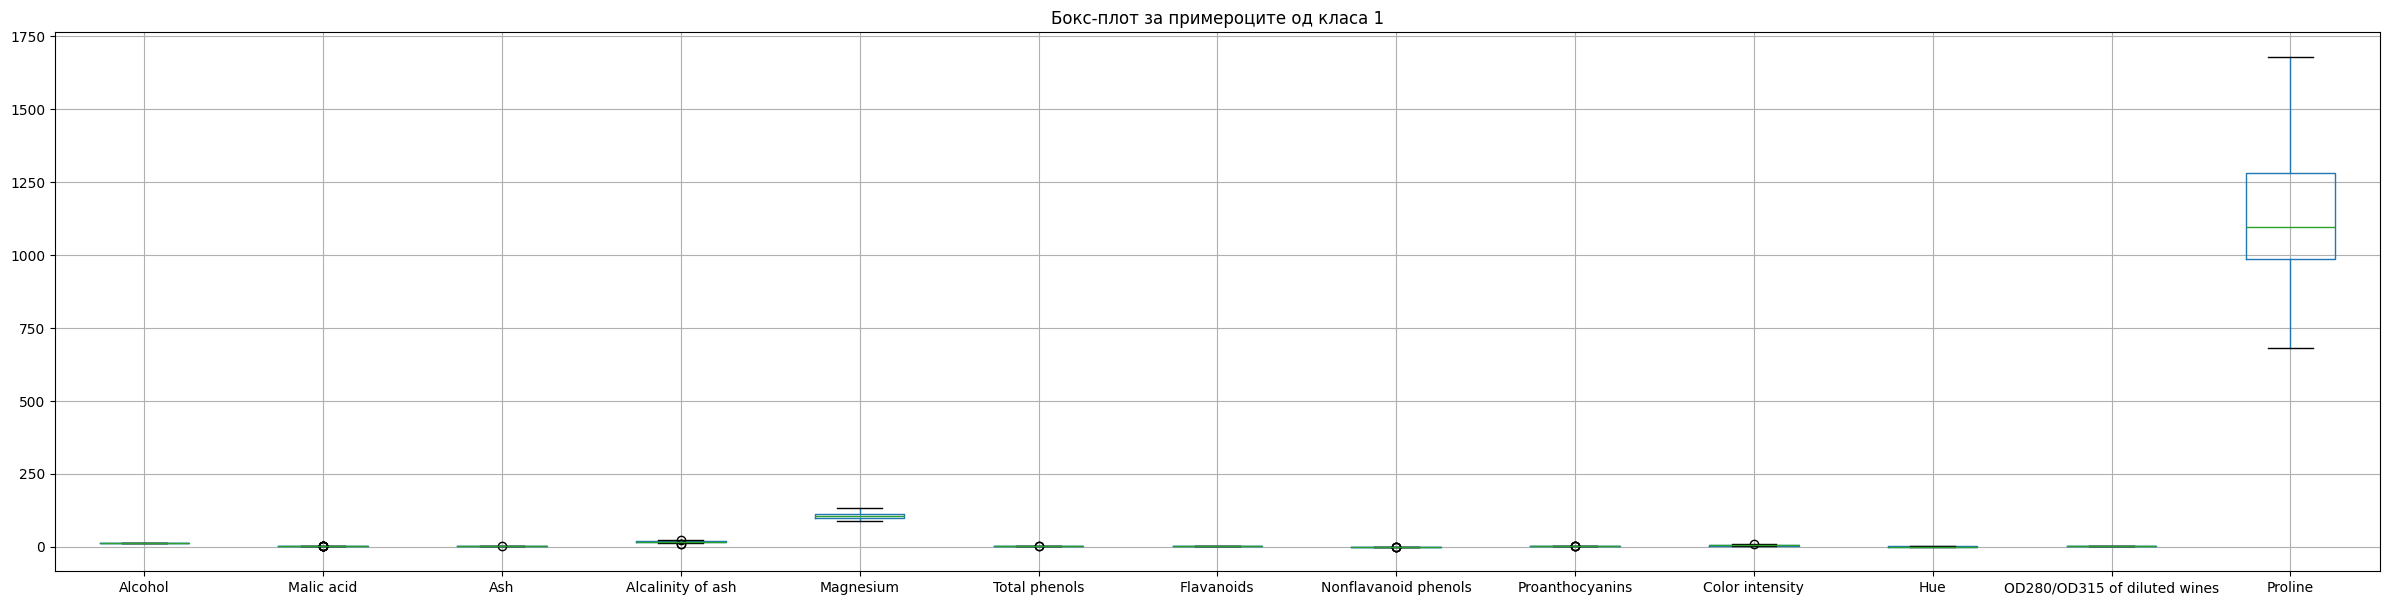

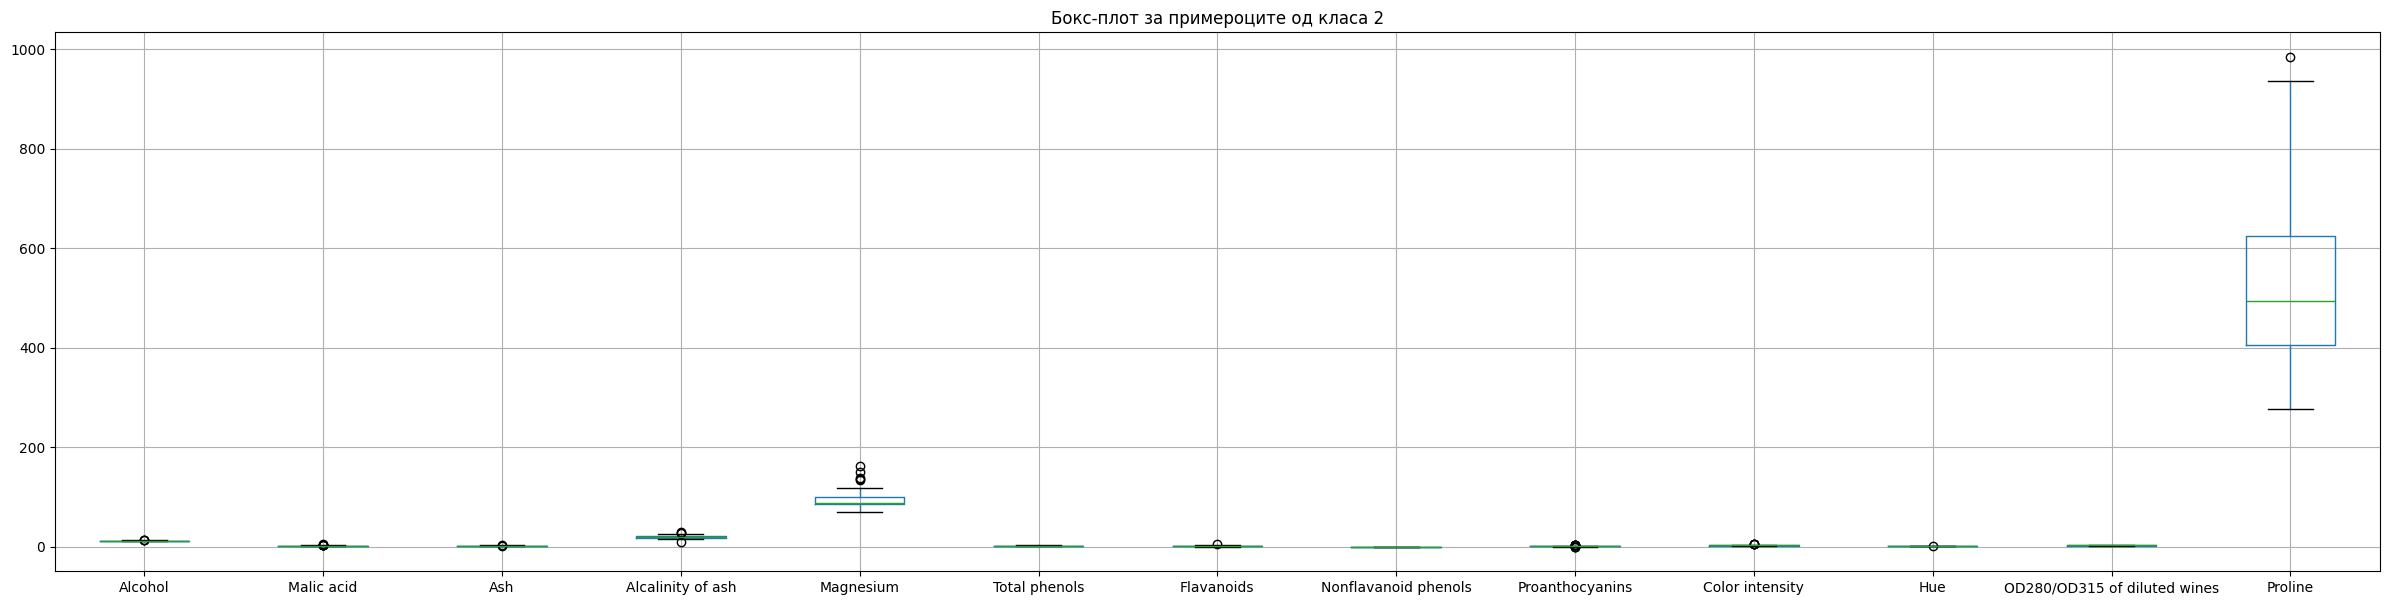

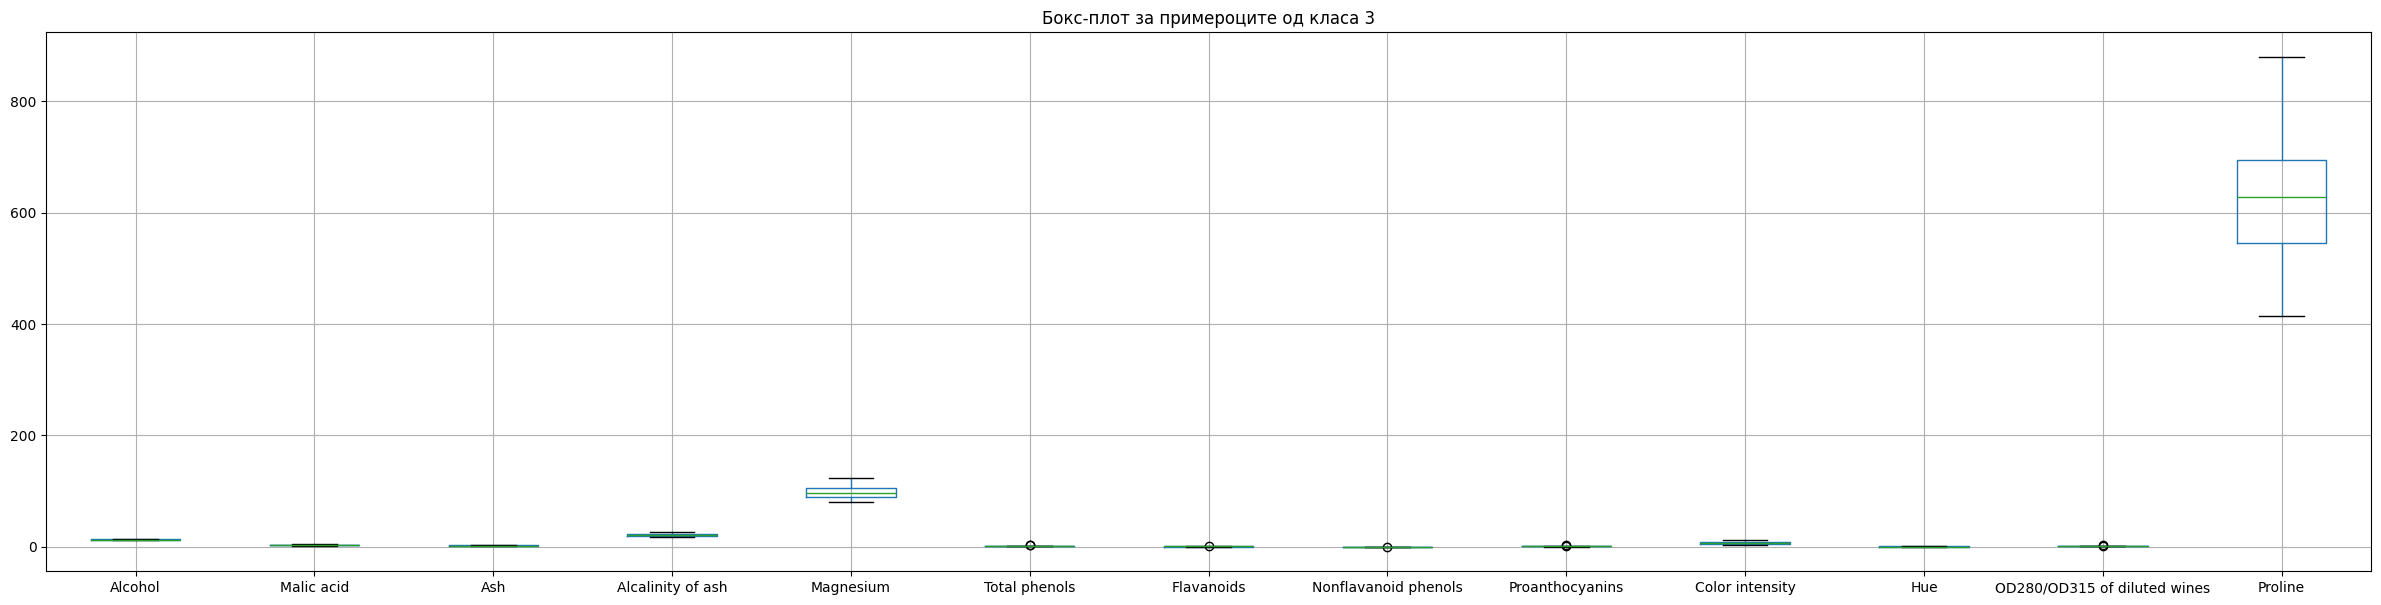

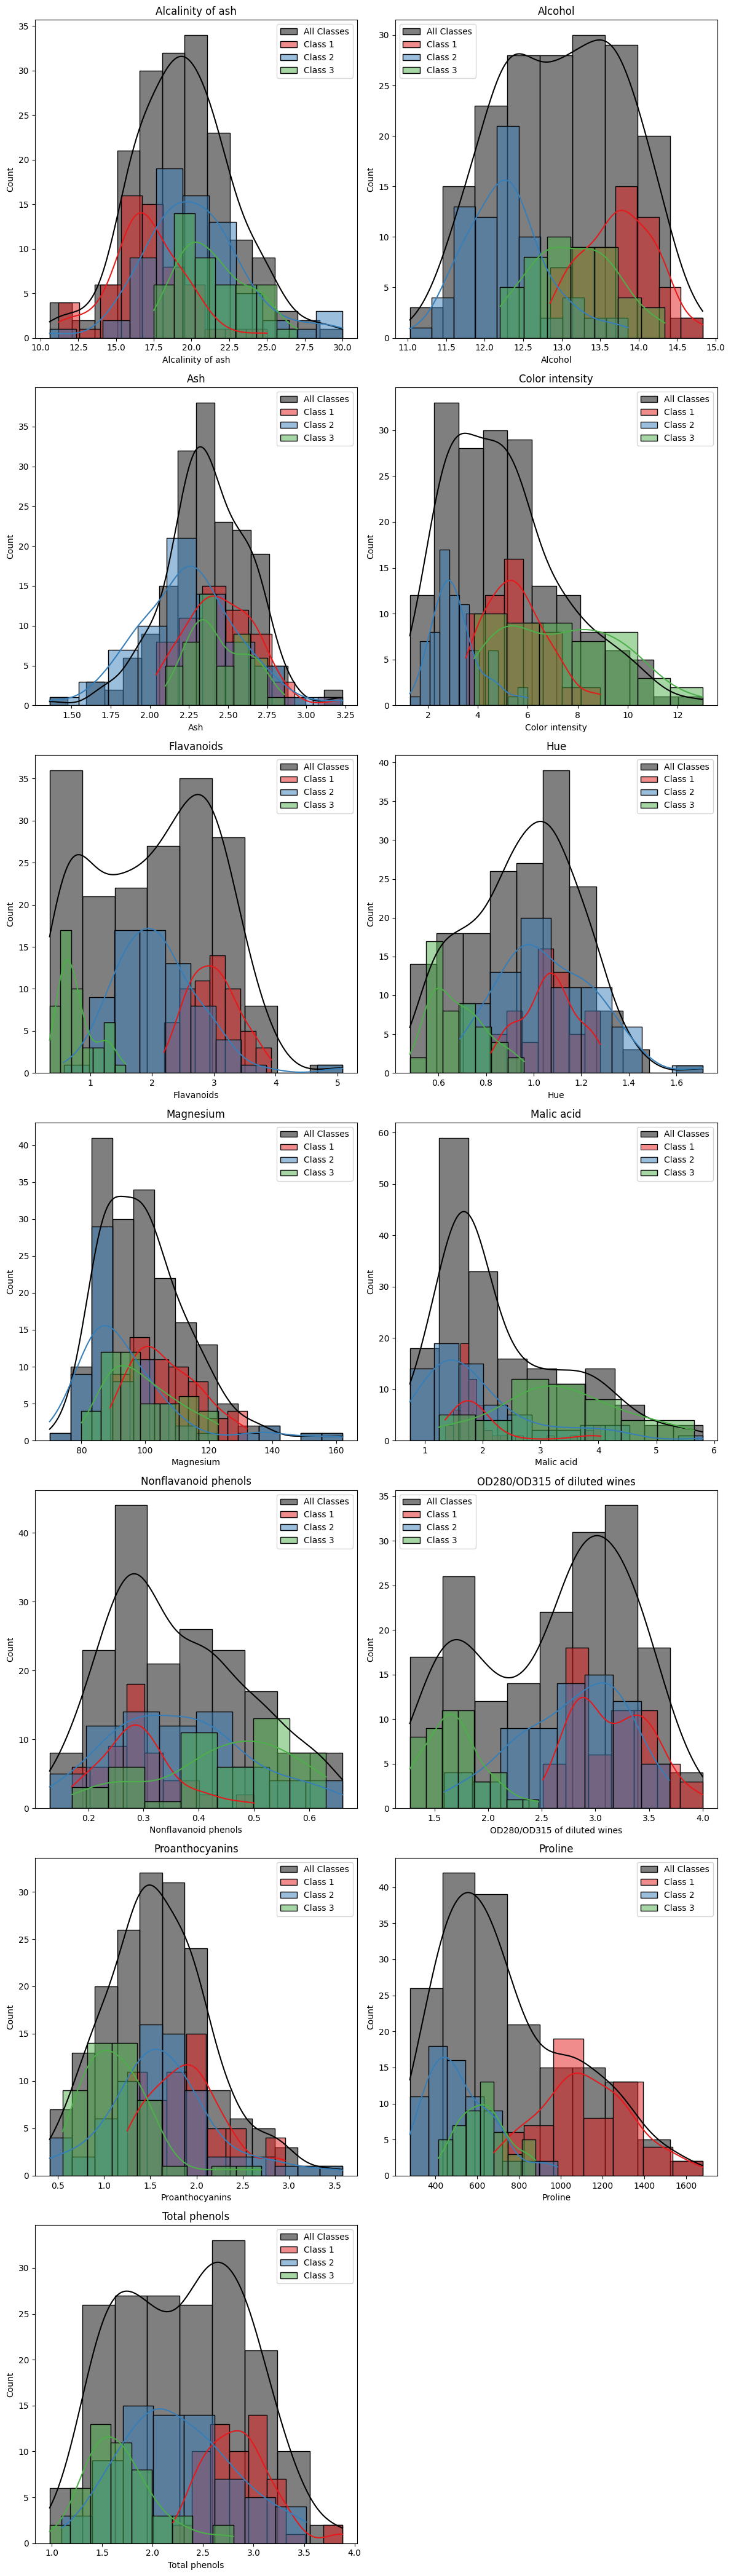

In [62]:
#Хистограм на распределбата на вредностите на антрибутите
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


number_of_classes = len(wine_df[target_column].unique())


num_features = len(feature_columns)


colors = sns.color_palette("Set1", number_of_classes)


cols = 2
rows = (num_features + 1) // cols

fig = plt.figure(figsize=(12, 6 * rows))

for feature_idx, feature in enumerate(feature_columns):
    ax = plt.subplot(rows, cols, feature_idx + 1)
    plt.title(feature)


    sns.histplot(wine_df[feature], color='black', label='All Classes', kde=True, stat="count", ax=ax)


    for class_idx in range(number_of_classes):
        class_data = wine_df[wine_df[target_column] == class_idx + 1]
        sns.histplot(class_data[feature], color=colors[class_idx], label=f'Class {class_idx + 1}', kde=True, stat="count", ax=ax)

    ax.legend()


plt.tight_layout()
plt.show()

In [66]:
#Дијаграм на растурање
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


number_of_features = len(feature_columns)
target_names = ['Class 1', 'Class 2', 'Class 3']
colors = sns.color_palette("Set1", 3)


fig = plt.figure(figsize=(100, 100), layout='constrained')


fig.subplots(nrows=number_of_features, ncols=number_of_features)


for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        ax = plt.subplot(number_of_features, number_of_features, number_of_features*feature_i + feature_j + 1)


        if feature_i == feature_j:
            for color, i, target_name in zip(colors, [1, 2, 3], target_names):
                plt.hist(wine_df[feature_columns[feature_i]][wine_df[target_column] == i],
                         alpha=0.6, color=color, label=target_name)
            plt.title(f"Feature {feature_columns[feature_i]} (Histogram)")
            plt.legend()


        else:
            for color, i, target_name in zip(colors, [1, 2, 3], target_names):  # Adjust class labels
                plt.scatter(wine_df[feature_columns[feature_i]][wine_df[target_column] == i],
                            wine_df[feature_columns[feature_j]][wine_df[target_column] == i],
                            alpha=0.6, color=color, label=target_name)
            plt.title(f"Feature {feature_columns[feature_i]} x Feature {feature_columns[feature_j]}")


        plt.xticks([])
        plt.yticks([])


plt.show()

In [67]:
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


number_of_features = len(feature_columns)
target_names = ['Class 1', 'Class 2', 'Class 3']
colors = sns.color_palette("Set1", 3)


fig = plt.figure(figsize=(100, 100), layout='constrained')


fig.subplots(nrows=number_of_features, ncols=number_of_features)


for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        ax = plt.subplot(number_of_features, number_of_features, number_of_features * feature_i + feature_j + 1)


        if feature_i == feature_j:
            for color, i, target_name in zip(colors, [1, 2, 3], target_names):
                sns.histplot(wine_df[feature_columns[feature_i]][wine_df[target_column] == i],
                             color=color, label=target_name, kde=True, legend=True, ax=ax)
            ax.set_title(f"Feature {feature_columns[feature_i]} (Histogram)")


        else:
            sns.scatterplot(data=wine_df, x=wine_df[feature_columns[feature_j]], y=wine_df[feature_columns[feature_i]],
                            hue=target_column, alpha=0.6, palette=colors, legend=False, ax=ax)
            ax.set_title(f"Feature {feature_columns[feature_i]} x Feature {feature_columns[feature_j]}")

        ax.set_xticks([])
        ax.set_yticks([])


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, target_names, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)


plt.tight_layout()
plt.show()

In [68]:
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


target_names = ['Class 1', 'Class 2', 'Class 3']
colors = sns.color_palette("Set1", len(target_names))


g = sns.pairplot(wine_df, hue=target_column, diag_kind="hist", palette=colors)


g._legend.set_bbox_to_anchor((0.5, 1))
g._legend.set_loc("lower center")


for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)


plt.show()

In [69]:
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


target_names = ['Class 1', 'Class 2', 'Class 3']
colors = sns.color_palette("Set1", len(target_names))


g = sns.pairplot(wine_df, hue=target_column, kind="kde", palette=colors)


g._legend.set_bbox_to_anchor((0.5, 1))
g._legend.set_loc("lower center")


for t, l in zip(g._legend.texts, target_names):
    t.set_text(l)


plt.show()

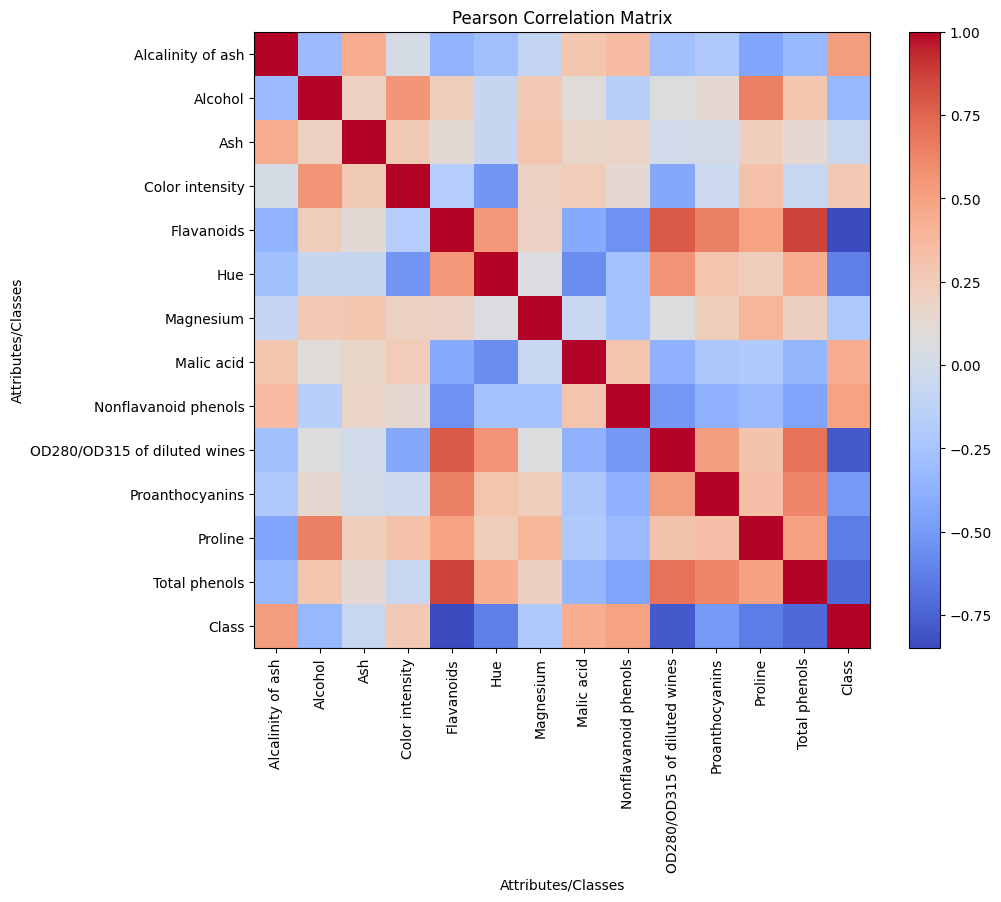

In [70]:
#Мерки за зависности ппомеѓу атрубутите, Пирсонов коефициент на корелација
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


X = wine_df[feature_columns].values
y = wine_df[target_column].values


number_of_features = len(feature_columns)


correlation_matrix = np.zeros((number_of_features + 1, number_of_features + 1))


for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(X[:, feature_i], X[:, feature_j])
        correlation_matrix[feature_i][feature_j] = corr


for feature_i in range(number_of_features):
    corr, _ = stats.pearsonr(X[:, feature_i], y)
    correlation_matrix[feature_i][number_of_features] = corr
    correlation_matrix[number_of_features][feature_i] = corr


corr, _ = stats.pearsonr(y, y)
correlation_matrix[number_of_features][number_of_features] = corr


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(number_of_features + 1), list(feature_columns) + [target_column], rotation=90)
plt.yticks(np.arange(number_of_features + 1), list(feature_columns) + [target_column])
plt.title("Pearson Correlation Matrix")
plt.xlabel("Attributes/Classes")
plt.ylabel("Attributes/Classes")
plt.show()


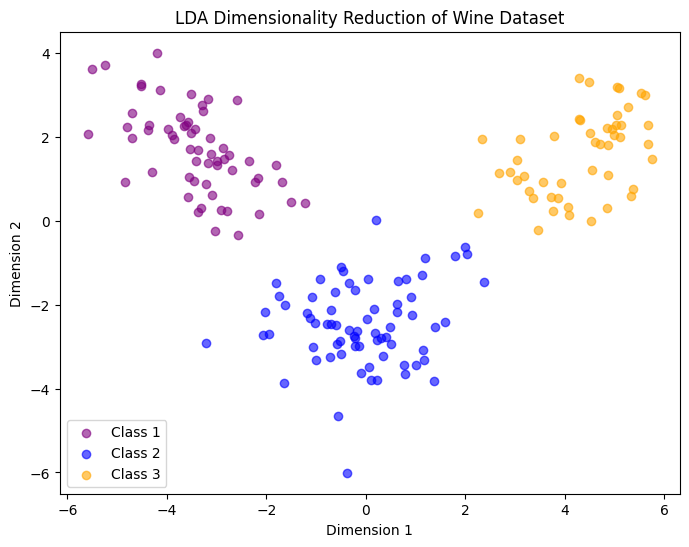

In [71]:
#Намалување на димензионалност со LDA
target_column = 'Class'
feature_columns = wine_df.columns.difference([target_column])


X = wine_df[feature_columns].values
y = wine_df[target_column].values


colors = ['purple', 'blue', 'orange']
target_names = wine_df[target_column].unique()

LDA_reduce = LinearDiscriminantAnalysis(n_components=2)
LDA_reduce.fit(X, y)
X_reduced = LDA_reduce.transform(X)


plt.figure(figsize=(8, 6))


for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], alpha=0.6, color=color,
                label=f'Class {target_name}')


plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('LDA Dimensionality Reduction of Wine Dataset')
plt.show()

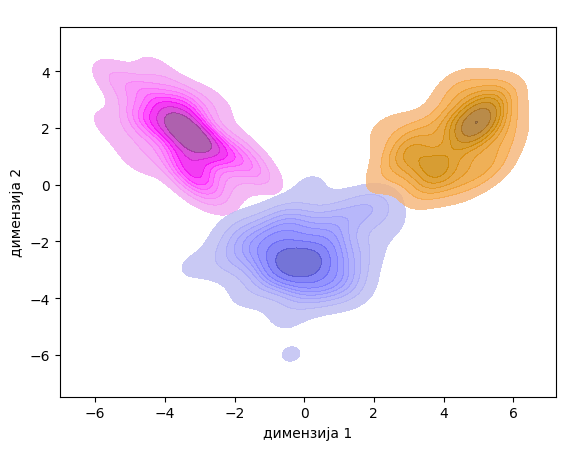

In [73]:
#естимација на густина
wine_df['димензија 1'] = pd.DataFrame(X_reduced[:, 0])
wine_df['димензија 2'] = pd.DataFrame(X_reduced[:, 1])
wine_df['target'] = y


colors = ['purple', 'blue', 'orange']
target_names = wine_df[target_column].unique()  # e.g., [1, 2, 3]


g = sns.kdeplot(data=wine_df, x="димензија 1", y="димензија 2", hue="target", palette=colors, alpha=0.8, fill=True)


handles, labels = g.get_legend_handles_labels()
g.legend(handles, target_names, labelcolor=colors, loc='lower center', bbox_to_anchor=(.5, 1), ncol=3, frameon=False)


plt.show()

In [74]:
#Класификација
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [75]:
#Класификација во оригиналното податочно множество, класификација со квадратна дискриминативна анализа
QDA = QuadraticDiscriminantAnalysis()


QDA.fit(X_train, y_train)


print("Приорните веројатности на класите се", QDA.priors_)


y_pred = QDA.predict(X_test)


QDA_accuracy = accuracy_score(y_test, y_pred)


print("Точноста на класификацијата со методот QDA за виното податочно множество е", round(QDA_accuracy, 3))


Приорните веројатности на класите се [0.32258065 0.40322581 0.27419355]
Точноста на класификацијата со методот QDA за виното податочно множество е 0.981


In [76]:
#Класификација со линеарна дискриминативна анализа
LDA = LinearDiscriminantAnalysis()


LDA.fit(X_train, y_train)


y_pred = LDA.predict(X_test)


LDA_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со методот LDA за виното податочно множество е", round(LDA_accuracy, 3))

Точноста на класификацијата со методот LDA за виното податочно множество е 1.0


In [78]:
#Класификација со Наивен Баесов класификатор
GNB = GaussianNB()


GNB.fit(X_train, y_train)


y_pred = GNB.predict(X_test)


GNB_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со Гаусовиот наивен Баесов класификатор за виното податочно множество е", round(GNB_accuracy, 3))

Точноста на класификацијата со Гаусовиот наивен Баесов класификатор за виното податочно множество е 1.0


Точноста на класификацијата со методот QDA во редуцираното вино податочно множество е 1.0


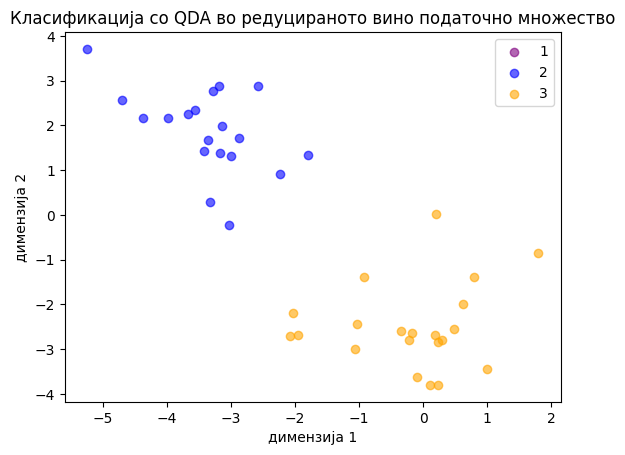

In [79]:
#Класификација во редуцирано податочно множество, класификација со квадратна дискриминативна анализа
QDA_reduced = QuadraticDiscriminantAnalysis()


QDA_reduced.fit(X_reduced_train, y_reduced_train)


y_pred = QDA_reduced.predict(X_reduced_test)


QDA_reduced_accuracy = accuracy_score(y_reduced_test, y_pred)


print("Точноста на класификацијата со методот QDA во редуцираното вино податочно множество е", round(QDA_reduced_accuracy, 3))


plt.figure()


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced_test[y_reduced_test == i, 0], X_reduced_test[y_reduced_test == i, 1], alpha=.6, color=color, label=target_name)


incorrect = y_pred != y_reduced_test
for i in range(len(incorrect)):
    if incorrect[i]:
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")


plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со QDA во редуцираното вино податочно множество')


plt.show()

Точноста на класификацијата со методот LDA во редуцираното вино податочно множество е 1.0


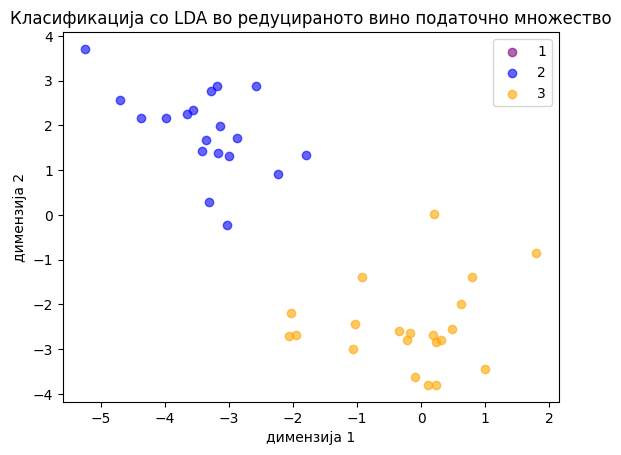

In [80]:
#Класификација со линеарна дискриминативна анализа
LDA_reduced = LinearDiscriminantAnalysis(solver='lsqr')


LDA_reduced.fit(X_reduced_train, y_reduced_train)


y_pred = LDA_reduced.predict(X_reduced_test)


LDA_reduced_accuracy = accuracy_score(y_reduced_test, y_pred)


print("Точноста на класификацијата со методот LDA во редуцираното вино податочно множество е", round(LDA_reduced_accuracy, 3))


plt.figure()


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced_test[y_reduced_test == i, 0], X_reduced_test[y_reduced_test == i, 1], alpha=.6, color=color, label=target_name)


incorrect = y_pred != y_reduced_test
for i in range(len(incorrect)):
    if incorrect[i]:
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")


plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со LDA во редуцираното вино податочно множество')


plt.show()

Точноста на класификацијата со Гаусов наивен Баесов класификатор во редуцираното вино податочно множество е 1.0


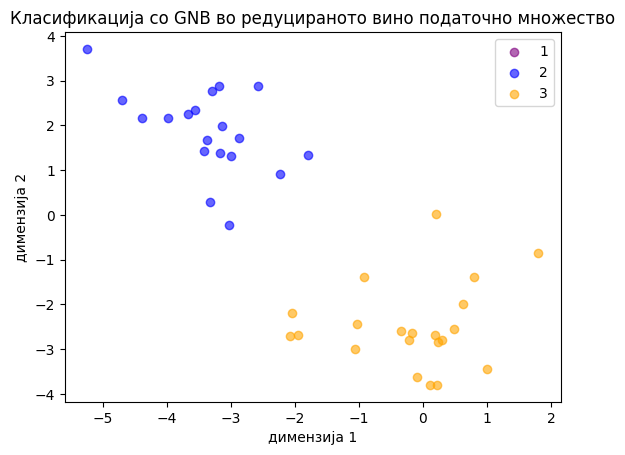

In [82]:
#Класификација со Наивен Баесов класификатор
GNB_reduced = GaussianNB()


GNB_reduced.fit(X_reduced_train, y_reduced_train)


y_pred = GNB_reduced.predict(X_reduced_test)


GNB_reduced_accuracy = accuracy_score(y_reduced_test, y_pred)


print("Точноста на класификацијата со Гаусов наивен Баесов класификатор во редуцираното вино податочно множество е", round(GNB_reduced_accuracy, 3))


plt.figure()


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced_test[y_reduced_test == i, 0], X_reduced_test[y_reduced_test == i, 1], alpha=.6, color=color, label=target_name)


incorrect = y_pred != y_reduced_test
for i in range(len(incorrect)):
    if incorrect[i]:
        plt.scatter(X_reduced_test[i][0], X_reduced_test[i][1], alpha=.6, color="black")


plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.title('Класификација со GNB во редуцираното вино податочно множество')


plt.show()

In [112]:
from scipy import linalg
from matplotlib import colors
import matplotlib as mpl

def plot_data(lda, X, y, y_pred):
    splot = plt.subplot(1, 1, 1)

    true = y == y_pred  # Точно предвидени класи
    true1, true2, true3 = true[y == 1], true[y == 2], true[y == 3]
    X1, X2, X3 = X[y == 1], X[y == 2], X[y == 3]
    X1_true, X1_false = X1[true1], X1[~true1]
    X2_true, X2_false = X2[true2], X2[~true2]
    X3_true, X3_false = X3[true3], X3[~true3]

    # Исцртување на примероците од сите класи
    plt.scatter(X1_true[:, 0], X1_true[:, 1], alpha=.6, color="purple",label='Class1')
    plt.scatter(X1_false[:, 0], X1_false[:, 1], marker="x", s=20, color="purple")

    plt.scatter(X2_true[:, 0], X2_true[:, 1],  alpha=.6, color="blue",label='Class2')
    plt.scatter(X2_false[:, 0], X2_false[:, 1], marker="x", s=20, color="blue")

    plt.scatter(X3_true[:, 0], X3_true[:, 1],  alpha=.6, color="orange",label='Class3')
    plt.scatter(X3_false[:, 0], X3_false[:, 1], marker="x", s=20, color="orange")

    # Исцртување на границите на одлука
    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5],colors="black")

    # Исцртување на средните вредности за сеекоја од класите
    plt.plot(lda.means_[0][0],lda.means_[0][1],"s",color="purple",markersize=15)
    plt.plot(lda.means_[1][0],lda.means_[1][1],"s",color="blue",markersize=15)
    plt.plot(lda.means_[2][0],lda.means_[2][1],"s",color="orange",markersize=15)
    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi
    ell = mpl.patches.Ellipse(mean,2*v[0]**0.5,2*v[1]**0.5,angle=180+angle,facecolor=color)
    ell.set_clip_box(splot.axes.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())

def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "purple")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")
    plot_ellipse(splot, lda.means_[2], lda.covariance_, "orange")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "purple")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], "orange")

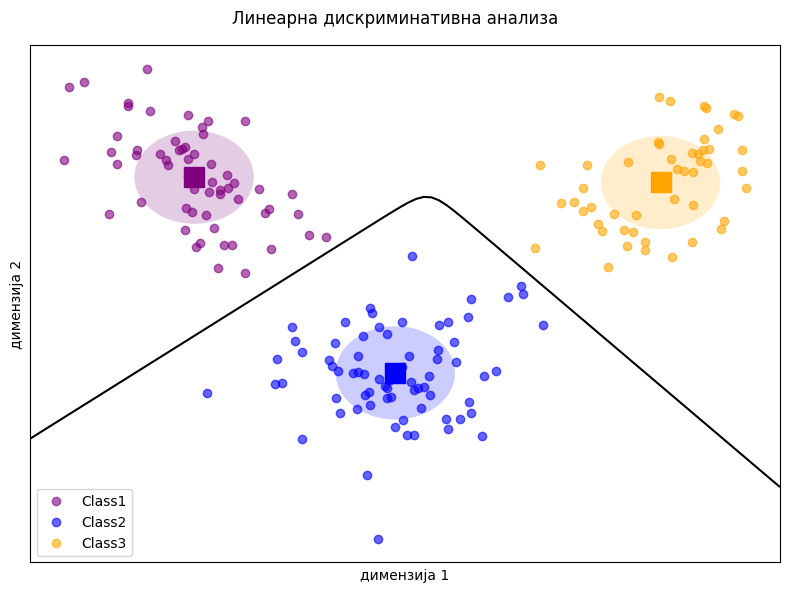

In [113]:
plt.figure(figsize=(8, 6))
plt.suptitle("Линеарна дискриминативна анализа")

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_reduced, y).predict(X_reduced)
splot = plot_data(lda, X_reduced, y, y_pred)
plot_lda_cov(lda, splot)
plt.axis("tight")
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.tight_layout()
plt.show()

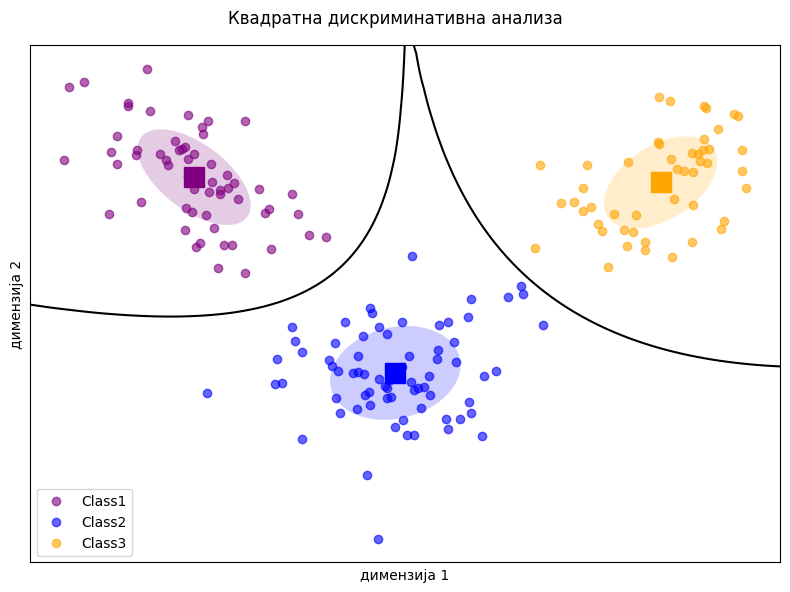

In [114]:
plt.figure(figsize=(8, 6))
plt.suptitle("Квадратна дискриминативна анализа")

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_reduced, y).predict(X_reduced)
splot = plot_data(qda, X_reduced, y, y_pred)
plot_qda_cov(qda, splot)
plt.axis("tight")
plt.legend()
plt.xlabel("димензија 1")
plt.ylabel("димензија 2")
plt.tight_layout()
plt.show()